# Show basic usage of NER and Sentiment analysis

## imports

In [4]:
! pip install nltk

In [78]:
! pip install asent

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.1/257.1 kB 2.2 MB/s eta 0:00:0000:0100:01


In [92]:
! pip install neuralcoref

Solving environment: | ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt



In [99]:
! pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.9/401.9 kB 2.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 13.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 44.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 34.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.4 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.

## Demonstrate Sentiment and Entity Analysis

In [118]:
import nltk
### Uncomment it when the script runs for the first time 
nltk.download('vader_lexicon')

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /data/home/pelegdav/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [117]:
import spacy
from spacy import displacy
import flair
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import asent
# import neuralcoref
# from textblob import TextBlob
# from spacytextblob.spacytextblob import SpacyTextBlob

text = "Apple is looking at buying U.K. startup for $1 billion"

# # neural coreference resolution
# coef = spacy.load('en_core_web_sm')
# neuralcoref.add_to_pipe(coef)
# doc = coef(text)
# print(doc._.coref_clusters)

# get a nlp model to do sentiment analysis on text
# model = flair.models.TextClassifier.load('en-sentiment')
sia = SentimentIntensityAnalyzer()
# tokenize input text
# sentence = flair.data.Sentence(text)
print(sia.polarity_scores(text))
# make sentiment prediction
# model.predict(sentence)
# extract sentiment direction and confidence (label and score) object
# sentiment = sentence
# print(sentiment)
# nlp = spacy.load("en_core_web_sm")
# nlp.add_pipe('spacytextblob')
# nlp.add_pipe("sentencizer")
# nlp.add_pipe('asent_en_v1')
# get the sentiment analysis
# doc = nlp(text)
# asent.visualize(doc, style='analysis')

# get a nlp model to do entity recognition on text
ner = spacy.load("en_core_web_sm")
# entity_analyzer = ner.add_pipe("ner")
# ner.add_pipe(entity_analyzer)
# get the entity recognition
doc = ner(text)
# visualize the results with displacy
displacy.render(doc, style="ent", jupyter=True)


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


## Demonstrate sentiment analysis with NLTK

In [115]:
PHRASES = ['Well, this week news broke that they had been in talks with Twitter for a $4 billion acquisition, so it looks like they’re still pretty desirable.',\
           'Wow, how things change.',\
           'Traveloka are poised to become public companies in coming months, kickstarting a coming-out party for Southeast Asia’s long-overlooked internet scene.',\
           'Former DHS Secretary Janet Napolitano spoke with Yahoo Finance about comprehensive immigration reform.']

for phrase in PHRASES:
  print(f'{phrase}')
  print(sia.polarity_scores(phrase))
  sentence = flair.data.Sentence(phrase)
  model.predict(sentence)
  print(sentence.get_label())

Well, this week news broke that they had been in talks with Twitter for a $4 billion acquisition, so it looks like they’re still pretty desirable.
{'neg': 0.084, 'neu': 0.603, 'pos': 0.313, 'compound': 0.7624}
Sentence: "Well , this week news broke that they had been in talks with Twitter for a $ 4 billion acquisition , so it looks like they ’re still pretty desirable ." → NEGATIVE (0.9044)
Wow, how things change.
{'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'compound': 0.5859}
Sentence: "Wow , how things change ." → POSITIVE (0.9985)
Traveloka are poised to become public companies in coming months, kickstarting a coming-out party for Southeast Asia’s long-overlooked internet scene.
{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.5719}
Sentence: "Traveloka are poised to become public companies in coming months , kickstarting a coming-out party for Southeast Asia ’s long-overlooked internet scene ." → POSITIVE (0.9941)
Former DHS Secretary Janet Napolitano spoke with Yahoo Finance ab

# News + Sentiment

In [ ]:
def get_articles_sentiments(keywrd, startd, sources_list = None, show_all_articles = False):
   
  news_client = NewsApiClient(api_key= NEWS_API_KEY)
  if type(startd) == str:
    my_date = datetime.strptime(startd,'%d-%b-%Y')
  else:
    my_date = startd
  # business_en_sources = news_client.get_sources('business','en')
  if sources_list:
    articles = news_client.get_everything(q = keywrd,
                                      from_param = my_date.isoformat(), 
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      sources = ",".join(sources_list),
                                      sort_by="relevancy",
                                      page_size = 100)
  else:
     articles = news_client.get_everything(q = keywrd,
                                       from_param = my_date.isoformat(), 
                                       to = (my_date + timedelta(days = 1)).isoformat(),
                                       language="en",
                                       sort_by="relevancy",
                                       page_size = 100)
  article_content = ''

  date_sentiments = {}
  date_sentiments_list = []
  seen = set()
  
  for article in articles['articles']:
    if str(article['title']) in seen:
      continue
    else:
      seen.add(str(article['title']))
      article_content = str(article['title']) + '. ' + str(article['description'])      
      sentiment = sia.polarity_scores(article_content)['compound']
      date_sentiments.setdefault(my_date, []).append(sentiment)
      date_sentiments_list.append((sentiment, article['url'],article['title'],article['description']))

  date_sentiments_l = sorted(date_sentiments_list, key=lambda tup: tup[0], reverse = True)   
  sent_list = list(date_sentiments.values())[0]

  return pd.DataFrame(date_sentiments_list, columns=['Sentiment','URL','Title','Description'])

In [ ]:
# Easy version when we don't filter the business source -- seems to be relevant though, but the description
# Get all sources in en

# return_articles = get_articles_sentiments(keywrd= 'Tesla stock' ,startd = '9-Apr-2021',sources_list = None, show_all_articles= True)
# return_articles.Sentiment.hist(bins=30,grid=False)
# print(return_articles.Sentiment.mean())
# print(return_articles.Sentiment.count())
# print(return_articles.Description)

# Every Day execution

    Sentiment  \
0      0.7003   
1      0.3089   
2      0.7184   
3      0.0258   
4      0.4588   
5     -0.3716   
6      0.5106   
7      0.5106   
8     -0.1511   
9      0.6114   
10     0.6369   
11    -0.0129   
12    -0.8271   
13     0.3818   
14     0.5574   
15    -0.1280   
16    -0.8625   
17     0.4588   
18    -0.0516   
19     0.7184   
20     0.4201   
21     0.0000   
22     0.2732   
23    -0.5859   
24    -0.4404   
25    -0.2023   
26     0.5267   
27    -0.5574   
28    -0.7184   
29    -0.5267   
30     0.0000   
31     0.0000   
32    -0.7399   
33     0.2023   
34    -0.5632   
35     0.4019   
36    -0.7399   
37    -0.4404   
38     0.3818   
39    -0.5859   
40     0.7845   
41    -0.7269   
42     0.4404   
43    -0.8020   
44    -0.4767   
45    -0.9001   
46    -0.0498   
47    -0.9423   
48    -0.3818   
49     0.8126   
50    -0.8126   
51    -0.2960   
52     0.1531   
53     0.5719   
54    -0.6597   
55    -0.4215   
56    -0.4767   
57    -0.7783 

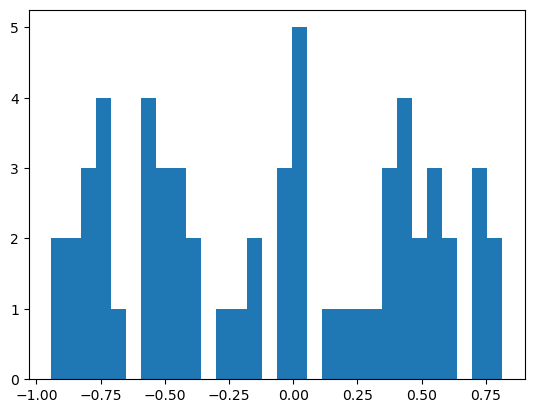

In [ ]:
# Easy version when we don't filter the business source -- seems to be relevant though, but the description
# Get all sources in en

my_date = date.today() - timedelta(days=1) 

return_articles = get_articles_sentiments(keywrd= 'Tesla stock' ,startd = my_date, sources_list = None, show_all_articles= True)
return_articles.Sentiment.hist(bins=30, grid=False)
print(return_articles)
# print(return_articles.Sentiment.mean())
# print(return_articles.Sentiment.count())
# print(return_articles.Description)

In [ ]:
return_articles["Date"] = my_date

In [ ]:
return_articles.head()

,Sentiment,URL,Title,Description,Date
0,0.7003,https://stocknews.com/news/tsla-will-china-be-the-ultimate-downfall-for-tesla-tsla/,Will China Be The Ultimate Downfall For Tesla (TSLA) ?,The recent short covering rally in Tesla stock provides a better price point to position to profit on a further pullback in TSLA.,2023-01-14
1,0.3089,https://www.fool.com/investing/2023/01/14/what-happened-to-tesla-this-week/,What Happened to Tesla This Week?,There's never a dull moment with Tesla.,2023-01-14
2,0.7184,https://www.fool.com/investing/2023/01/15/2-beaten-down-cathie-wood-stocks-bargain-buys/,2 Beaten-Down Cathie Wood Stocks That Could Be Bargain Buys for 2023,Wood is betting on these players for their innovation and high growth potential.,2023-01-14
3,0.0258,https://www.fool.com/investing/2023/01/15/better-buy-costco-vs-target-stock/,Better Buy: Costco Vs. Target Stock,These two retailers have what it takes to outlast a recession.,2023-01-14
4,0.4588,https://www.fool.com/investing/2023/01/14/nike-stock-in-2023-bull-vs-bear/,Nike Stock In 2023: Bull vs. Bear,Can this leading sportswear business satisfy investors this year?,2023-01-14


In [ ]:
return_articles.sort_values(by='Sentiment', ascending=True)[['Sentiment','URL', 'Description','Title']].head(2)

,Sentiment,URL,Description,Title
47,-0.9423,https://www.breitbart.com/tech/2023/01/14/up-in-smoke-elon-musk-breaks-guinness-world-record-for-worst-loss-of-fortune/,"Tesla CEO, Twitter owner, and self-promoter Elon Musk has broken the world record for ""worst loss of fortune,"" according to Guinness World Records.",Up in Smoke: Elon Musk Breaks Guinness World Record for 'Worst Loss of Fortune'
45,-0.9001,https://www.business-standard.com/article/international/elon-musk-rebuffed-in-bid-to-move-misleading-tesla-tweet-trial-to-texas-123011400035_1.html,"A federal judge on Friday rejected Tesla CEO Elon Musk's bid to move or delay a trial over a misleading tweet about a potential buyout of the electric automaker, setting the stage for the mercurial billionaire to be thrust into a legal drama amid the turmoil …",Elon Musk rebuffed in bid to move misleading Tesla tweet trial to Texas


In [ ]:
return_articles.sort_values(by='Sentiment', ascending=False)[['Sentiment','URL', 'Description','Title']].head(2)

,Sentiment,URL,Description,Title
49,0.8126,https://wccftech.com/tesla-says-drivers-saved-more-than-2-billion-in-gas-costs-in-2022/,"Electric vehicle giant Tesla, Inc claims that its cars have enabled drivers to save more than $2 billion in fuel costs in 2022. Tesla shared the data on Twitter earlier this week as part of an upgrade to its application which will now let users see how much e…",Tesla Says Drivers Saved More Than $2 Billion In Gas Costs In 2022
40,0.7845,https://economictimes.indiatimes.com/markets/stocks/news/ahead-of-market-10-things-that-will-decide-stock-action-on-monday/articleshow/97005734.cms,"“The recent recovery in the global markets has failed to impress the participants so far. However, the mood might change if they manage to sustain the gains. To regain some strength, Nifty should decisively cross the 18,100 mark. Meanwhile, participants shoul…",Ahead of Market: 10 things that will decide stock action on Monday


In [ ]:
return_articles.to_csv("TSLA_news_sentiments_"+my_date.isoformat()+".csv")